In [1]:
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import sys
import numpy as np
from math import pow, pi, cos, sin
sys.path.append("../build/bindings/python/")
from pyfluxrt import *

In [2]:
rng = RNG()

In [3]:
def plot_points_2d(f, num=1000):
    x, y = [], []
    for i in range(num):
        v = f()
        x.append(v.x), y.append(v.y)
    display(max(x))
    plt.figure(figsize=(8, 4), dpi=80)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(x, y, s=2)
    plt.title(f'x={min(x):.2f}:{max(x):.2f}, y={min(y):.2f}:{max(y):.2f}')
    plt.show()
    plt.figure(figsize=(8, 4), dpi=80)
    plt.hist2d(x, y, (20, 10), cmap=plt.cm.bone)
    #plt.hist2d(x, y, (200, 100), cmap=plt.cm.bone)


In [4]:
envmap = LatLonEnvironmentMap()
envmap_file = '/Volumes/Extra/data/envmaps/latlon_furnace_0_8.png'
#envmap_file = '/Volumes/Extra/data/envmaps/latlon_furnace_0_8_100x50.png'
#envmap_file = '/Volumes/Extra/data/envmaps/hdrihaven/adams_place_bridge_1k.hdr'
envmap.loadFromFile(envmap_file)
#envmap_image = Image.open(envmap_file)
#display(envmap_image.resize((200,100)))

In [5]:
def importanceSampleEnvMap(envmap, rng):
    pdf = 0.0
    e1, e2 = rng.uniform01(), rng.uniform01()
    return envmap.importanceSample(e1, e2, pdf)

19.998046875

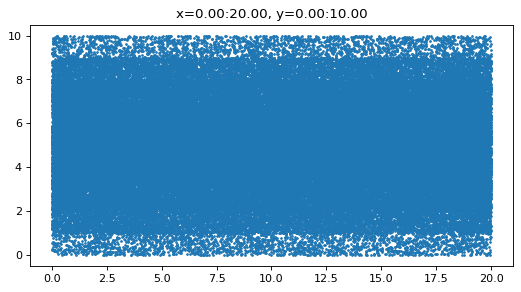

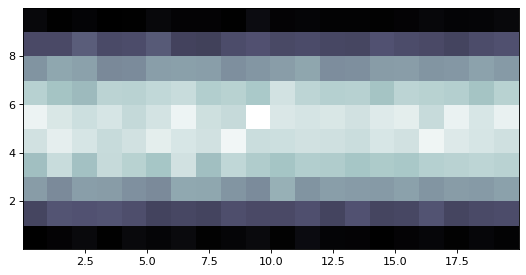

In [8]:
plot_points_2d(lambda : importanceSampleEnvMap(envmap, rng), num=1000)

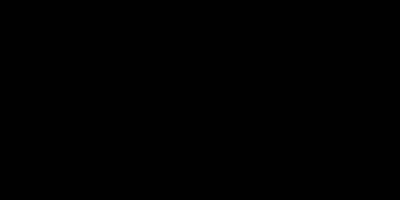

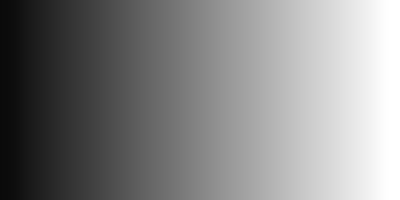

In [7]:
envmap.saveDebugImages()
envmap_pdf_image = Image.open('envmap_pdf.png')
envmap_rowsums_image = Image.open('envmap_rowsums.png')
display(envmap_pdf_image.resize((400, 200)))
display(envmap_rowsums_image.resize((400, 200)))